# Plan-It Corrosion Educational Product
## EN.535.610.81.FA25 Course Project
### By Amelia Triplett and Sophia Zell

<h1>Table of Contents (IN PROGRESS, modifying)<span class="tocSkip">
</span></h1><div class="toc"><ul class="toc-item">

**NOTE: Links in this TOC are not functioning yet**

 **(but they are a skeleton for now!**

<li><span>
<a href="#Set-up" data-toc-modified-id="Set-up-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Set-up</a></span><ul class="toc-item">

<li><span><a href="#Install-packages" data-toc-modified-id="Install-packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Install packages</a></span>

</li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import modules
</li></ul><li><span><a href="#Start Here: Video Introduction" data-toc-modified-id="Start-here-intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Start Here: Video Introduction</a></span><ul class="toc-item"></ul></li>
</li></ul><ul><li><span><a href="#Corrosion-chemical-reaction" data-toc-modified-id="Corrosion-chemical-reaction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Corrosion Chemical Reaction</a></span><ul class="toc-item"></ul></li>
</li></ul><ul><li><span><a href="#Established-Corrosion-Models" data-toc-modified-id="Established-Corrosion-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Established Corrosion Models</a></span><ul class="toc-item"></ul></li>

</li></ul><ul><li><span><a href="#Educational-Questions" data-toc-modified-id="Educational-Questions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Educational Questions</a></span><ul class="toc-item"></ul></li>

</li></ul><ul><li><span><a href="#Sources" data-toc-modified-id="Established-Corrosion-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sources</a></span><ul class="toc-item"></ul></li>

</li></ul><ul><li><span><a href="#Reference" data-toc-modified-id="Reference-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reference</a></span><ul class="toc-item"></ul></li>

# Set-up

# Import modules

In [30]:
# Library imports
import numpy as np
import pandas as pd
import scipy as sp
import math
import chempy as cp
import pint
import ipywidgets as ipw
from ipywidgets import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
from IPython.display import YouTubeVideo
from IPython.display import display

In [31]:
# initalization of unit registry from Pint
u = pint.UnitRegistry()

# Start Here: Video Introduction

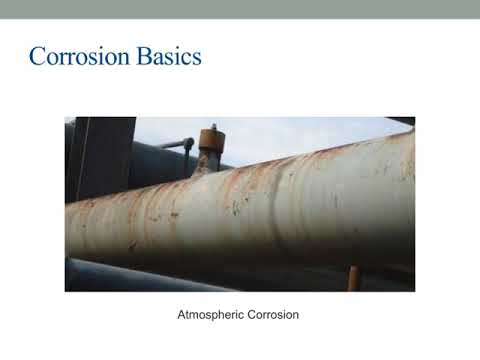

In [32]:
display(YouTubeVideo('EkmADuVygNk'))

#Corrosion Chemical Reaction

In [33]:
# ---------- Anodic reaction: metal dissolution (Fe example) ----------

# Balance the anodic half-reaction for iron.
# Note: ChemPy expects Fe²⁺ to be written as "Fe+2", not "Fe2+".
anode_react, anode_prod = cp.balance_stoichiometry({"Fe"}, {"Fe+2", "e-"})
print("Anodic reaction:")
print(" ".join(f"{v} {k}" for k,v in anode_react.items()),
      "→",
      " + ".join(f"{v} {k}" for k,v in anode_prod.items()))

print() # blank line for readability

# ---------- Cathodic reaction 1: oxygen reduction (neutral/alkaline) ----------

# Balance the cathodic half-reaction for oxygen reduction in neutral/alkaline solution:

# Cathodic 1: oxygen reduction
cat_react, cat_prod = cp.balance_stoichiometry({"O2", "H2O", "e-"}, {"OH-"})
print("Cathodic reaction (oxygen reduction):")
print(" + ".join(f"{v} {k}" for k,v in cat_react.items()),
      "→",
      " + ".join(f"{v} {k}" for k,v in cat_prod.items()))

print()

# ---------- Cathodic reaction 2: hydrogen evolution (acidic) ----------

# Balance the cathodic half-reaction for hydrogen evolution in acidic solution:

# Cathodic 2: hydrogen evolution (acidic)
cat2_react, cat2_prod = cp.balance_stoichiometry({"H+", "e-"}, {"H2"})
print("Cathodic reaction (hydrogen evolution):")
print(" + ".join(f"{v} {k}" for k,v in cat2_react.items()),
      "→",
      " + ".join(f"{v} {k}" for k,v in cat2_prod.items()))

print()

# ---------- Overall "rust" formation ----------

# Balance a simplified rust-formation reaction.
# This is an overall reaction for Fe reacting with water and oxygen
# to form Fe(OH)3 as a generic corrosion product.
rust_r, rust_p = cp.balance_stoichiometry({"Fe", "H2O", "O2"}, {"Fe(OH)3"})
print("Rust formation:")
print(" + ".join(f"{v} {k}" for k, v in rust_r.items()),
      "→",
      " + ".join(f"{v} {k}" for k, v in rust_p.items()))

Anodic reaction:
1 Fe → 1 Fe+2 + 2 e-

Cathodic reaction (oxygen reduction):
2 H2O + 1 O2 + 4 e- → 4 OH-

Cathodic reaction (hydrogen evolution):
2 H+ + 2 e- → 1 H2

Rust formation:
4 Fe + 6 H2O + 3 O2 → 4 Fe(OH)3


### Established Corrosion Models

Below are four models related to corrosion: two models for organic coating degradation and service-life and two models for corrosion of metal materials. Many of the variables in these models are empirically/experimentally derived. The numbers available for use in this educational product are subjective and theoretical while being of similar orders of magnitude to experimental measurements. Unless empirically/experiemental derived values are used, the results are suitable for educational purposes only.

In general, models for organic coating degrdation often rely on variables such as coating resistance, reaction and diffusion rates, time, and surface areas. Values for these inputs can be determined from electrochemical impedance spectroscopy (EIS) studies.

In general, models for the corrosion of metals rely on temperture, relative humidity, the deposition rates or concentrations of pollutants, and/or empirically-derived corrosion rates.

Three-Stage Organic Coating Failure Kinetic Model from X. Mu et al, 2025:

In [34]:
def organic_coating_failure_stage1(Rc0, k1, t):
  """
  Stage 1 – Corrosive-medium penetration (permeation stage)
  ---------------------------------------------------------
  Rc(t) = Rc0 * exp(-k1 * t)

  Parameters
  ----------
  Rc0 : float or Quantity
        Initial coating resistance at t = 0 (Ω·cm²).
  k1 : float or Quantity
       Stage-1 permeation rate constant (days⁻¹). Larger k1 means faster
       penetration of water/ions and faster loss of barrier resistance.
  t : float or Quantity
      Time since exposure began (days).

  Returns
  -------
  Rct : float or Quantity
        Coating resistance at time t in Stage 1 (Ω·cm²).

  Notes
  -----
  This stage describes gradual exponential decay of resistance as
  corrosive species diffuse through the coating, while the coating still
  behaves mainly as a barrier.
  """
  Rct = Rc0*np.exp(-k1*t) # exponential decay of the barrier property, (Ω·cm²)

  return Rct

def plot_organic_coating_failure_stage1(Rc0,k1,t_days, save_flag):
    param_string = f'Rc0{Rc0}_k1{k1}'
    plt.plot(t_days,organic_coating_failure_stage1(Rc0, k1, t_days))
    plt.xlabel('Time (days)')
    plt.ylabel('Coating Resistance $ohm**2$')
    plt.title('Organic Coating Failure: 1. Water Permeation')
    if save_flag:
       savefig('OrganicCoatingFailureS1'+param_string + '.png')

In [35]:
def organic_coating_failure_stage2(Rct0, k2, t, t1):
  """
  Stage 2 – Interfacial reaction stage
  -----------------------------------
  Rc(t) = Rct0 / (1 + k2 * (t - t1))

  Parameters
  ----------
  Rct0 : float or Quantity
         Coating resistance at the moment Stage 2 begins (t = t1) (Ω·cm²).
  k2 : float or Quantity
       Stage-2 interfacial reaction rate constant (d⁻¹). Larger k2 corresponds
       to more aggressive corrosion and faster resistance loss.
  t : float or Quantity
      Time (days).
  t1 : float or Quantity
       Time when Stage 1 ends and Stage 2 begins (days).

  Returns
  -------
  Rct : float or Quantity
        Coating resistance at time t in Stage 2 (Ω·cm²).

  Notes
  -----
  This stage represents corrosion and product buildup at the
  coating–metal interface. The rational decay form gives the steep,
  step-like drop in impedance seen once corrosion initiates.
  """
  print(f't:{t}')
  print(f't1:{t1}')
  #tau = t-t1 # time since Stage 2 started
  #Rct = Rct0/(1+(k2*tau)) # rational/reciprocal decay (Ω·cm²)
  Rct=Rct0/(1+(k2*(t-t1)))
  return Rct

def plot_organic_coating_failure_stage2(Rct0, k2, t_days, t1, save_flag):
    param_string=f'Rct0{Rct0}_k2{k2}_t1{t1}'
    plt.plot(t_days, organic_coating_failure_stage2(Rct0, k2, t_days, t1))
    plt.xlabel('Time (days)')
    plt.ylabel('Coating Resistance $ohm**2$')
    plt.title('Organic Coating Failure: 2. Interfacial Reaction Phase')
    if save_flag:
     savefig('OrganicCoatingFailureS2'+param_string + '.png')

In [36]:
def organic_coating_failure_stage3(delta0, k3, t, t2, Rct=None, totalarea=None):
  """
  Stage 3 – Delamination and macroscopic coating failure
  ------------------------------------------------------
  δ(t) = δ0 + k3 * sqrt(t - t2)

  Parameters
  ----------
  delta0 : float or Quantity
           Initial defect/delamination area at the start of Stage 3 (cm²).
  k3 : float or Quantity
       Delamination propagation rate constant (cm²·d⁻¹ᐟ²).
  t : float or Quantity
      Time (days).
  t2 : float or Quantity
       Time when Stage 3 begins (days).
  Rct : float or Quantity, optional
        Coating resistance at the start of Stage 3 (Ω·cm²). Used if an
        effective resistance is desired.
  totalarea : float or Quantity, optional
              Total coated area (cm²). Used to map delaminated area to an
              effective resistance.

  Returns
  -------
  If Rct and totalarea are both provided:
      deltat : float or Quantity
               Delaminated area at time t (cm²).
      Reff : float or str
             Effective remaining coating resistance (Ω·cm²), or a message
             if the entire area has delaminated.
  If Rct or totalarea is missing:
      deltat : float or Quantity
               Delaminated area at time t (cm²).

  Notes
  -----
  Stage 3 tracks growth of the detached area. If Rct and totalarea
  are provided, a simple area-fraction scaling is used to estimate how
  much impedance remains as delamination progresses.
  """
  print(f't:{type(t)}')
  print(f't2:{t2}')
  tau = t-t2  # time since Stage 3 began
  deltat = delta0+(k3*np.sqrt(tau)) # delamination growth law

  # If user wants effective resistance:
  if Rct is not None and totalarea is not None:
    # Check if delaminated area exceeds the coating area
    if deltat >= totalarea:
      coating_delaminated = 'Total area delaminated. No coating left.'
      return deltat, coating_delaminated
    else:
      # Compute the effective resistance based on remaining intact area
      # Basic form: Reff = Rct * (1-fraction of coating area still attached)
      Reff = Rct*(1-((deltat-delta0)/(totalarea)))
      return deltat, Reff
  else:
    # If only delamination size is requested (no Rc calculation)
    return deltat

def plot_organic_coating_failure_stage3(delta0, k3, t_days, t2, Rct, totalarea, save_flag):
  param_string=f'delta0{delta0}_k3{k3}_t2{t2}'
  plt.plot(t_days,organic_coating_failure_stage3(delta0, k3, t_days, t2, Rct=None, totalarea=None))
  plt.xlabel('Time (days)')
  plt.ylabel('Area of Delamination ($cm**2$)')
  plt.title('Organic Coating Failure: 3. Coating Delamination Phase')
  if save_flag:
    savefig('OrganicCoatingFailureS3'+param_string + '.png')

In [37]:
Rc0 = (7**9)*(u.ohm)*(u.cm**2)
k1 = 0.01/u.day
t = 90*u.day
Rct = organic_coating_failure_stage1(Rc0, k1, t)
Rct

<Quantity(16406552.3, 'ohm * centimeter ** 2')>

In [38]:
k2 = 0.005/u.day
t1 = 365*u.day
Rct2 = organic_coating_failure_stage2(Rct, k2, t1, t)
Rct2

t:365 day
t1:90 day


<Quantity(6908022.01, 'ohm * centimeter ** 2')>

In [39]:

delta0 = 0.3*(u.cm**2)
k3 = 0.4*((u.cm**2)/(u.day**0.5))
t2 = 5500*u.day
organic_coating_failure_stage3(delta0, k3, t2, t1)

t:<class 'pint.Quantity'>
t2:365 day


<Quantity(28.9635657, 'centimeter ** 2')>

In [40]:
totalarea = 30*(u.cm**2)
deltat, Reff = organic_coating_failure_stage3(delta0, k3, t2, t1, Rct2, totalarea)
print(deltat)
print(Reff)

t:<class 'pint.Quantity'>
t2:365 day
28.96356572375461 centimeter ** 2
307737.2463863258 centimeter ** 2 * ohm


In [41]:
critical_impedance_threshold = (10**7)*(u.ohm*(u.cm**2)) #From Y. Xu et al, 2022

In [42]:
def organic_coating_time_to_failure(Rc0, Rcrit, k1, k2, k3=None, f=0.2, f2=0.05, delta0=None, totalarea=None):
    """
    Three-stage organic coating failure: time-to-threshold calculator.

    This function uses the analytical Stage 1 and Stage 2 models to find
    the time when the coating resistance Rc(t) first falls below a user-
    defined critical impedance threshold Rcrit. It also estimates the
    nominal Stage-transition times and (optionally) a time to complete
    delamination in Stage 3.

    Parameters
    ----------
    Rc0 : float or Quantity
          Initial coating resistance at t = 0 (Ω·cm²).
    Rcrit : float or Quantity
            Critical resistance threshold for failure (same units as Rc0).
    k1 : float or Quantity
         Stage-1 rate constant (d⁻¹).
    k2 : float or Quantity
         Stage-2 rate constant (d⁻¹).
    k3 : float or Quantity, optional
         Stage-3 delamination rate constant in
         δ(t) = δ0 + k3 * sqrt(t - t2)  (cm²·d⁻¹ᐟ²).
    f : float, optional
        Fraction of Rc0 at which Stage 1 ends and Stage 2 begins
        (default 0.2 → Stage 1 ends when Rc(t) = 0.2 Rc0).
    f2 : float, optional
         Fraction of Rc0 at which Stage 2 transitions to Stage 3
         (default 0.05 → Stage 3 starts when Rc(t) = 0.05 Rc0).
         Must satisfy 0 < f2 < f < 1.
    delta0 : float or Quantity, optional
             Initial delamination area at the start of Stage 3 (cm²).
    totalarea : float or Quantity, optional
                Total coating area (cm²), used for estimating full delamination
                time in Stage 3.

    Returns
    -------
    t_fail : float or Quantity
             Time when Rc(t) first drops below Rcrit (days).
    stage : str
            Description of which stage the failure threshold is reached in.
    t1 : float or Quantity
         Nominal end time of Stage 1 (Rc = f * Rc0) (days).
    t2 : float or Quantity
         Nominal end time of Stage 2 / start of Stage 3
         (Rc = f2 * Rc0) (days).
    t_delam : float or Quantity or None
              Time when δ(t) reaches totalarea in Stage 3 (full delamination),
              or None if Stage-3 inputs (delta0, totalarea, k3) are not given.
    """

    # ---- Basic checks on dimensionless parameters ----
    # f and f2 must be floats (dimensionless)
    f = float(f)
    f2 = float(f2)
    if not (0.0 < f < 1.0):
        raise ValueError("f must be in (0, 1).")
    if not (0.0 < f2 < f):
        raise ValueError("f2 must be in (0, f).")

    # ---- Stage 1 → Stage 2: compute t1 ----
    # Stage 1: Rc(t) = Rc0 * exp(-k1 * t)
    # At t1: Rc(t1) = f * Rc0
    # exp(-k1 * t1) = f  →  t1 = ln(1/f) / k1
    t1 = np.log(1.0 / f) / k1      # if k1 is 1/time, t1 has units of time
    Rct0 = Rc0 * f                 # Rc at the start of Stage 2

    # ---- Decide where Rc crosses Rcrit (failure time) ----

    # Intial coating resistance is already below threshold at t = 0
    if Rcrit >= Rc0:
        t_fail = 0 * t1  # "0" with same time units as t1
        stage = "Failure in Stage 1 (at t=0)"

    else:
        # Stage 1 crossing:
        # Rc0 * exp(-k1 t) = Rcrit
        # → exp(-k1 t) = Rcrit/Rc0  →  t = (1/k1) ln(Rc0/Rcrit)
        ratio_1 = Rc0 / Rcrit           # dimensionless quantity
        t_s1 = np.log(ratio_1) / k1     # has units of time

        # 0 * t_s1 is "zero time" with correct Pint units
        t_zero = 0 * t_s1

        if t_zero <= t_s1 <= t1:
            t_fail = t_s1
            stage = "Failure in Stage 1"
        else:
            # Stage 2
            # At t1, Rc(t1) = Rct0; if Rcrit < Rct0 then cross in Stage 2
            if Rcrit < Rct0:
                # Stage 2: Rc(t) = Rct0 / (1 + k2 (t - t1))
                # Set Rc(t) = Rcrit:
                #   Rcrit = Rct0 / (1 + k2 (t - t1))
                # → 1 + k2 (t - t1) = Rct0 / Rcrit
                # → t = t1 + (Rct0 / Rcrit - 1)/k2
                ratio_2 = Rct0 / Rcrit           # dimensionless
                t_s2 = t1 + (ratio_2 - 1.0) / k2 # has time units
                t_fail = t_s2
                stage = "Failure in Stage 2"
            else:
                # If Rcrit >= Rct0 and we didn't catch it in Stage 1,
                # something is inconsistent with the model.
                raise ValueError("Threshold not reached in a consistent way in Stages 1–2.")

    # ---- Stage 2 → Stage 3: compute t2 from Rc = f2 * Rc0 ----
    # We define t2 such that in Stage 2:
    #   Rc(t2) = f2 * Rc0
    #
    # Stage 2 model:
    #   Rc(t) = Rct0 / (1 + k2 (t - t1)),  with Rct0 = f * Rc0
    #
    # Set Rc(t2) = f2 * Rc0:
    #   f2 * Rc0 = f * Rc0 / (1 + k2 (t2 - t1))
    # → f2 = f / (1 + k2 (t2 - t1))
    # → 1 + k2 (t2 - t1) = f / f2
    # → t2 = t1 + (f/f2 - 1) / k2
    ratio_f = f / f2                 # pure float
    t2 = t1 + (ratio_f - 1.0) / k2   # has units of time

    # ---- Stage 3: time to total delamination (t_delam) ----
    # Stage 3 delamination model:
    #   delta(t) = delta0 + k3 * sqrt(t - t2)
    #
    # Total delamination when:
    #   delta(t_delam) = totalarea
    # → delta0 + k3 * sqrt(t_delam - t2) = totalarea
    # → sqrt(t_delam - t2) = (totalarea - delta0)/k3
    # → t_delam = t2 + ((totalarea - delta0)/k3)^2
    t_delam = None
    if (delta0 is not None) and (k3 is not None) and (totalarea is not None):
        # Make sure these are all Pint-compatible or floats with same units
        if totalarea <= delta0:
            # Already totally delaminated at t2
            t_delam = t2
        else:
            # (totalarea - delta0)/k3 should have units of sqrt(time)
            dt_sqrt = (totalarea - delta0) / k3
            t_delam = t2 + dt_sqrt**2  # time units

    # ---- Return everything ----
    return t_fail, stage, t1, t2, t_delam

def plot_organic_coating_time_to_failure(Rc0, Rcrit, k1, k2, k3, f, f2, delta0, totalarea, save_flag):
  # Convert user selected Rc0 bounds into an array of points for plotting time to failure vs Rc0
  Rc0_plot = np.linspace(Rc0[0], Rc0[1], 200)
  # Parameter String for use in saving image:
  param_string = f'Rc0{Rc0[0]}-{Rc0[1]}_Rcrit{Rcrit}_k1{k1}_k2{k2}_f{f}_f2{f2}'
  plt.plot(Rc0_plot,organic_coating_time_to_failure(Rc0_plot, Rcrit, k1, k2, k3=None, f=0.2, f2=0.05, delta0=None, totalarea=None))
  plt.xlabel('Initial Coating Resistance at t_${0}$')
  plt.ylabel('Coating Time to Failure (days)')
  plt.title('Organic Coating Time to Failure')
  if save_flag:
    plt.savefig('organicCoatingTimeToFailure'+param_string+'png')

In [43]:
z1, z2, z3, z4, z5 = organic_coating_time_to_failure(Rc0, critical_impedance_threshold, k1, k2, f=0.2, f2=0.05, delta0=delta0, k3=k3, totalarea=totalarea)
print(z1)
print(z2)
print(z3)
print(z4)
print(z5)

139.50956905395 day
Failure in Stage 1
160.94379124341003 day
760.94379124341 day
6274.00629124341 day


In [44]:
Rc0_widget = ipw.FloatLogSlider(value=100, base=10, min=1, max=10, step=1)
Rcrit_widget = ipw.FloatLogSlider(value=100, base=10, min=1, max=10, step=1)
k1_widget = ipw.FloatSlider(min=0.001, max=0.1, step=0.003, readout_format='.3f')
k2_widget = ipw.FloatSlider(min=0.001, max=0.1, step=0.003, readout_format='.3f')
k3_widget = ipw.FloatSlider(min=0.05, max=0.9, step=0.05, readout_format='.2f')
f_widget = ipw.FloatSlider(value=0.2, min=0.1, max=0.9, step=0.1)
f2_widget = ipw.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01)
delta0_widget = ipw.FloatSlider(value=0.3, min=0.1, max=5, step=0.1)
totalarea_widget = ipw.FloatSlider(value=30, min=5, max=1000, step=1)
ipw.interact(organic_coating_time_to_failure, Rc0=Rc0_widget, Rcrit=Rcrit_widget, k1=k1_widget, k2=k2_widget, k3=k3_widget, f=f_widget, f2=f2_widget, delta0=delta0_widget, totalarea=totalarea_widget)

interactive(children=(FloatLogSlider(value=100.0, description='Rc0', max=10.0, min=1.0, step=1.0), FloatLogSli…

<function __main__.organic_coating_time_to_failure(Rc0, Rcrit, k1, k2, k3=None, f=0.2, f2=0.05, delta0=None, totalarea=None)>

In [ ]:
delta0_widget = ipw.FloatSlider(value = 0.3, min=0.1, max=5, step=0.1)
k3_widget = ipw.FloatSlider(value = 0.2, min=0.1, max=1.0, step=0.1)
t_widget = ipw.IntSlider(value=720, min=1, max=25000, step=10)
t2_widget = ipw.IntSlider(value=720, min=1, max=25000, step=10)
Rct_widget = ipw.FloatLogSlider(value=100, base=10, min=1, max=10, step=1)
totalarea_widget = ipw.FloatSlider(value = 30, min=5, max=1000, step=1)
ipw.interact(organic_coating_failure_stage3, delta0=delta0_widget, k3=k3_widget, t=t_widget, t2=t2_widget, Rct=Rct_widget, totalarea=totalarea_widget)

interactive(children=(FloatSlider(value=0.3, description='delta0', max=5.0, min=0.1), FloatSlider(value=0.2, d…

<function __main__.organic_coating_failure_stage3(delta0, k3, t, t2, Rct=None, totalarea=None)>

Organic Coating Service Life Prediction from Y. Xu et al, 2022:

In [46]:
def organic_coating_service_life(rp, k, thetacr, Mtw, L, Dw):
  """
  Predict the service life (t_cr) of an organic coating using the model
  proposed by Xu, Song, & Zheng (2022) for corrosion-induced coating rupture.

  This function directly implements Equation (23) from the paper:
      t_cr = (rp / k) * ln(theta_cr / M_tw)  +  L^2 / (π * D_w)

  Parameters
  ----------
  rp : Polarization resistivity of the substrate per unit exposed area.
       (Units: Ω·cm² or equivalent depending on convention)

      - rp represents how strongly the metal resists corrosion
        **before** delamination occurs.
      - Larger rp → slower corrosion → longer service life.
  k : Rate parameter describing the volume expansion ratio of corrosion
      products relative to consumed metal (see Eq. 14–16).
      (Units: Ω·cm²/days)

      - Larger k indicates stronger wedging effect → faster delamination.
  thetacr : Critical substrate area (θ_cr) that, once delaminated or exposed,
        causes macroscopic coating rupture.
        (Units: cm²)

        - This is the threshold for failure in the model.
  Mtw : Initial corrosion-affected area of the substrate at the moment the
        water front reaches the substrate (M_tw), Eq. (20).
        (Units: cm²)

        - This represents the "starting point" at time t = t_w,
          when electrolyte reaches the metal.
  L : Initial corrosion-affected area of the substrate at the moment the
      water front reaches the substrate (M_tw), Eq. (20).
      (Units: cm or microns)

      - This represents the "starting point" at time t = t_w,
        when electrolyte reaches the metal.
  Dw : Diffusion coefficient of water/moisture in the through-defects/pores.
      (Units: cm²/days)

      - Appears in the diffusion-time term L² / (π D_w).

  Returns
  -------
  tcr : Predicted coating service life (time for coating rupture).
        (Units: seconds if Dw is in cm²/s and L is in cm.
         Or days if inputs are converted appropriately.)

  Notes
  -----
  The first term (rp / k) * ln(theta_cr / M_tw) is the reaction-
  controlled contribution from interfacial corrosion and product
  wedging. The second term L² / (π D_w) is the diffusion-controlled
  time for water to reach the substrate through defects.
  """
  tcr = (rp/k)*(np.log(thetacr/Mtw))+((L**2)/(np.pi*Dw)) #days
  return tcr

# Plot
def plot_organic_coating_service_life(rp, k, thetacr, Mtw, L, Dw, save_flag):
    param_string = ['r_${p}$: '+f'{rp:.2f}, k: {k:.2f}, '+ 'theta_${cr}$: '+
             f'{thetacr:.2f}'+'D_${w}$: '+f'{Dw:.2f}'+'M_${tw}$: '+f'{Mtw:.2f}']
    plt.plot(L, organic_coating_service_life(rp, k, thetacr, Mtw, L, Dw),
             label= param_string)#'r_${p}$: '+f'{rp:.2f}, k: {k:.2f}, '+ 'theta_${cr}$: '+
             #f'{thetacr:.2f}'+'D_${w}$: '+f'{Dw:.2f}'+'M_${tw}$: '+f'{Mtw:.2f}')
    plt.xlabel('L (cm)')
    plt.ylabel('Time for Coating to Start Rupturing, t_${cr}$ (days)')
    plt.title('Organic Coating Service Life')
    plt.ylim(0, 300)
    plt.grid()
    plt.legend()
    if save_flag:
        plt.savefig('organicServiceLife'+param_string+'png')

In [47]:
rp = (7**9)*((u.ohm)*(u.cm**2))
k = (10**6)*(((u.ohm)*(u.cm**2))/u.days)
thetacr = 0.1*(u.cm**2)
Mtw = 0.001*(u.cm**2)
L = 10*(u.micrometer)
Dw = (6.51*10**-14)*((u.cm**2)/u.seconds)

L.ito(u.cm)
Dw.ito((u.cm**2)/u.days)

organic_coating_service_life(rp, k, thetacr, Mtw, L, Dw)

<Quantity(242.427274, 'day')>

Corrosion-model on Carbon Steel from A. Sil and V. N. Kumar, 2020:

In [48]:
def carbon_steel_corrosion_model(T, RH, SO2, Cl, t_y=None):
  """
  Empirical atmospheric corrosion model for carbon steel
  (Sil & Kumar, 2020).

  Short-term (1-year) corrosion rate:
      Cr = X1 + X2 T + X3 RH + X4 SO2 + X5 Cl

  Long-term average rate:
      Crt = Cr / (2 ln(t^1.3))

  Parameters
  ----------
  T : float
      Temperature (°C).
  RH : float
       Relative humidity (%).
  SO2 : float
       SO₂ deposition rate (mdd).
  Cl : float
       Chloride deposition rate (mdd).
  t_y : float, optional
        Exposure time in years. If provided, a long-term average
        corrosion rate Crt is also returned.

  Returns
  -------
  If t_y is None:
      Cr : Quantity
           Short-term (1-year) corrosion rate (µm/year).
  If t_y is not None:
      Cr : Quantity
           Short-term rate (µm/year).
      Crt : Quantity
            Long-term average corrosion rate over t_y (µm/year).
  """
  # Empirical coefficients from the paper (Table 5).
  X1 = -283.07834
  X2 = 2.11513
  X3 = 2.90685
  X4 = 33.77407
  X5 = 52.43965

  # Short-term (1-year) corrosion rate, Cr (µm/year, before units attached)
  Cr = X1+(X2*T)+(X3*RH)+(X4*SO2)+(X5*Cl)
  if t_y is not None:
    # Long-term rate Crt from Eq. (15):
    #   Crt = Cr / (2 ln(t^1.3))
    Crt = Cr/(2*np.log(t_y**1.3))
    return Cr*(u.micrometer/u.year), Crt*(u.micrometer/u.year)
  else:
    return Cr*(u.micrometer/u.year)

# Plot the Carbon Steel model
def plot_carbon_steel_corrosion_model(T, RH, SO2, Cl, t_y, save_flag ):
  #
  Cr, Crt = carbon_steel_corrosion_model(T,RH, SO2, Cl, t_y)
  param_string = ['C_${r}$: '+f'{Cr:.3f}'+'T: '+ f'{T:.3f}'+'RH: ' +
                  f'{RH:.3f}'+'SO2: '+f'{SO2:.3f}'+'Cl: '+f'{Cl:.3f}']
  plt.plot(t_y, Crt, label='C_${r}$: '+f'{Cr:.3f}')
  plt.xlabel(f'Time (years)') #({t_y.units})')
  plt.ylabel('Long-term Corrosion Rate')
  plt.title('Carbon-Steel Corrosion Model')
  plt.legend()
  plt.ylim(0,100)
  plt.grid()
  if save_flag:
    plt.savefig('carbonSteelModel_'+param_string+'.png')

Power Function Model from Y. Cai et al, 2020:

In [49]:
def power_function_model(C1, t_y, PFM_layerMaterial):
  """
  Generic power-function corrosion kinetics model.

      C(t) = C1 * t^n

  Parameters
  ----------
  C1 : float or Quantity
       Scaling constant (e.g. corrosion depth at t = 1 year).
  t : float or Quantity
      Time (same units used when C1 was defined, typically years).
  PFM_layerMaterial : str
      Material name used to look up n via get_n_from_material().

  Returns
  -------
  C : float or Quantity
      Corrosion loss (thickness, depth, or mass-equivalent) at time t.
  """
    # Get the exponent n based on the selected material/coating.
  n = get_n_from_material(PFM_layerMaterial)
    # Apply the power function model
  C = C1*(t_y**n)
  return C

def plot_power_function_model(C1, t_y, PFM_layerMaterial):
  plt.plot(t_y, power_function_model(C1,t_y,PFM_layerMaterial),
           label=f'C1: {C1}, Layer Material: {PFM_layerMaterial}')
  plt.xlabel(f'Time (years)')
  plt.ylabel('Atmospheric Corrosion Loss, C')
  plt.title('Power Function Model')
  plt.ylim(0,20000)
  plt.legend()

In [50]:
# Power Function Model Material Utility:
#   Based on user-selected layer material, get corresponding "n" value
def get_n_from_material(PFM_layerMaterial):
  """
  Parameters
  ----------
  PFM_layerMaterial : str
      Name of the metal or layer material, e.g. "Carbon Steel",
      "Zinc", "Copper", "Aluminum".

  Returns
  -------
  n : float
      Exponent in the power-law corrosion model C(t) = C1 * t^n.

  Notes
  -----
  Values are taken from atmospheric corrosion studies where
  power-law kinetics were fit for different metals. If the
  material name is not recognized, a conservative n = 1 is used.
  """
  match PFM_layerMaterial:
        case "Carbon Steel":
            n = 0.575
        case "Zinc":
            n = 0.873
        case "Copper":
            n = 0.726
        case "Aluminum":
            n = 0.807
        case _:
            n=1
  print(f"Using {PFM_layerMaterial}, with conservative estimate n = {n}")
  return n

**User-Specified Inputs**

In [51]:
# Given that the following functions are defined:
# THIS IS NOTES, TODO: REMOVE ONCE DONE!!!
#   carbon_steel_corrosion_model --> Integrated!!!
#   organic_coating_service_life --> Integrated!!!
#   organic_coating_time_to_failure
#   power_function_model--> Integrated!!
#   organic_coating_failure_stage1, organic_coating_failure_stage2, organic_coating_failure_stage3

# SET UP WIDGETS:

# 1. Prompt user to select which Corrosion Model to investigate:
#    Use a drop-down menu, providing the available models

# Adding this style_description prevents dropdown description from being truncated
style_description = {'description_width': 'initial'}
# Create dropdown selection for models:
w_ModelDD = ipw.Dropdown(description = "Corrosion Model", style=style_description,
                           options = ["Three-Stage Organic Coating Failure Kinetic Model: Permeation",
                                      "Three-Stage Organic Coating Failure Kinetic Model: Interaction",
                                      "Three-Stage Organic Coating Failure Kinetic Model: Delamination",
                                      "Organic Coating Time to Failure",
                                      "Organic Coating Service Life Prediction",
                                      "Corrosion-Model on Carbon Steel",
                                      "Power Function Model"],
                          layout = Layout(width = '50%', height = '50px'))
# Allow the user to define a range of time to investigate:
w_t= ipw.FloatRangeSlider(value=[0.1, 50.0],
                                      min=-0.1,
                                      max=100.0,
                                      step=0.1,
                                      description='Time (years)')


In [52]:
# IF POWER FUNCTION MODEL:
w_PFM_layerMaterial = widgets.Dropdown(description="Corrosion Product",
                                        style = style_description,
                                        options = ["Carbon Steel",
                                                  "Zinc",
                                                  "Copper",
                                                  "Aluminum"])

In [53]:
save_button = widgets.Button(description="Click to Save Fig!")
output = widgets.Output()


# Change status of save_flag to true
def on_button_clicked(b):
    with output:
    # Clear previous output
        save_flag=True
        print("Save Flag Clicked!")

        return save_flag
save_button.on_click(on_button_clicked)

In [54]:
#  Define the callback function
def on_selection_change(change):
    if change['name'] == 'value':  # Ensure we are reacting to a 'value' change
        selected_option = change['new']
        print(f"New selection: {selected_option}")
        status_changed = True
        # Add your command or function call here
        # For example, you could call another function:
        # process_data(selected_option)
        return status_changed

# Create the Dropdown widget
#dropdown_widget = widgets.Dropdown(
#    options=['Option A', 'Option B', 'Option C'],
#    value='Option A',
#    description='Select:',
#    disabled=False,
#)

# 2. Register the callback function using observe
w_ModelDD.observe(on_selection_change, names='value', )


In [55]:
# Evaluate model based on user's selections
def process_model_selection(user_selected_model,user_selected_t, save_flag_in):
  # Format user-selected-time-tuple into an array for evaluation/plotting purposes
    t_in_y = np.linspace(user_selected_t[0], user_selected_t[1], 10) #Changed from 200
    t_in_d = t_in_y*365 # Convert user_selected_t range to days from years
    print(f't_in_y{t_in_y}')
    print(f't_in_d{t_in_d}')
    print("Using Corrosion Model: \n ", user_selected_model)

    match user_selected_model:
        case "Organic Coating Time to Failure":
          #Rc0_widget = ipw.FloatRangeSlider(value=[5,10], base=10, min=1, max=100, step=1, description='R_${c0}$')
          Rc0_plot = np.linspace(0,100, 10)
          Rcrit_widget = ipw.FloatLogSlider(value=100, base=10, min=1, max=10, step=1)
          k1_widget = ipw.FloatSlider(min=0.001, max=0.1, step=0.003, readout_format='.3f')
          k2_widget = ipw.FloatSlider(min=0.001, max=0.1, step=0.003, readout_format='.3f')
          k3_widget = ipw.FloatSlider(min=0.05, max=0.9, step=0.05, readout_format='.2f')
          f_widget = ipw.FloatSlider(value=0.2, min=0.1, max=0.9, step=0.1)
          f2_widget = ipw.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01)
          delta0_widget = ipw.FloatSlider(value=0.3, min=0.1, max=5, step=0.1)
          totalarea_widget = ipw.FloatSlider(value=30, min=5, max=1000, step=1)
          ipw.interact(plot_organic_coating_time_to_failure, Rc0=Rc0_plot, Rcrit=Rcrit_widget,
                      k1=k1_widget, k2=k2_widget, k3=k3_widget, f=f_widget, f2=f2_widget,
                      delta0=delta0_widget, totalarea=totalarea_widget, save_flag=fixed(save_flag_in))

        case "Three-Stage Organic Coating Failure Kinetic Model: Permeation":
            # TO DO:
            print("All 3 stages IN DEVELOPMENT")
            Rc0_def = (7**9)*(u.ohm)*(u.cm**2)
            k1_def = 0.01/u.day

            ipw.interact(plot_organic_coating_failure_stage1,
                         Rc0=(Rc0_def.magnitude*0.75,Rc0_def.magnitude*1.25, 1**8),
                         k1=(k1_def.magnitude*0.75, k1_def.magnitude*1.25, k1_def.magnitude*0.1),
                         t_days=fixed(t_in_d), save_flag=fixed(save_flag_in))
        case "Three-Stage Organic Coating Failure Kinetic Model: Interaction":
            Rct0_def = 1
            k2_def = 0.005/u.day
            t1_def = 365 #*u.day
            t1_widget=FloatSlider(min=t1_def*0.75, max=t1_def*1.25, step =(t1_def)*0.1)
            plot_organic_coating_failure_stage2(Rct0=(Rct0_def*0.75,
                                                      Rct0_def*1.25, Rct0_def*0.1),
                                                 k2=(k2_def.magnitude*0.75,
                                                      k2_def.magnitude*1.25, k2_def.magnitude**0.1),
                                                 t_days=fixed(t_in_d), t1=(t1_def*0.75,
                                                 t1_def*1.25, 1), save_flag=fixed(save_flag_in))
        case "Three-Stage Organic Coating Failure Kinetic Model: Delamination":
            delta0_def = 0.3*(u.cm**2)
            k3_def = 0.4*((u.cm**2)/(u.day**0.5))
            t2_def = 5500*u.day
            t2_widget=FloatSlider(min=t2_def.magnitude*0.75, max=t2_def.magnitude*1.25, step =(t2_def.magnitude)*0.1)
            # Widget:
            plot_organic_coating_failure_stage3(delta0=(delta0_def.magnitude*0.75,
                                                      delta0_def.magnitude*1.25, delta0_def.magnitude*0.1),
                                                k3=(k3_def.magnitude*0.75,
                                                      k3_def.magnitude*1.25, k3_def.magnitude*0.1),
                                                t_days=t_in_y,
                                                t2=(3000,7000, 100), Rct=None, totalarea=None,
                                                       save_flag=fixed(save_flag_in))

        case "Organic Coating Service Life Prediction":

            # Default Values:
            rp_def = (7**9)*((u.ohm)*(u.cm**2))
            k_def = (10**6)*(((u.ohm)*(u.cm**2))/u.days)
            thetacr_def = 0.1*(u.cm**2)
            Mtw_def = 0.001*(u.cm**2)
            L_def = 10*(u.micrometer)
            Dw_def = (6.51*10**-14)*((u.cm**2)/u.seconds)

            L_def.ito(u.cm)
            Dw_def.ito((u.cm**2)/u.days)
            ipw.interact(plot_organic_coating_service_life,rp=(rp_def.magnitude*0.75, rp_def.magnitude*1.25, 1**8),
                         k=(k_def.magnitude*0.75, k_def.magnitude*1.25, 1**6),
                         thetacr=(thetacr_def.magnitude*0.75, thetacr_def.magnitude*1.25, 0.005),
                         Mtw=(Mtw_def.magnitude*0.75, Mtw_def.magnitude*1.25, 0.0001),
                         L=fixed(np.linspace(L_def.magnitude*0.75,L_def.magnitude*1.25, 200)),
                         Dw=fixed(Dw_def.magnitude), save_flag=fixed(save_flag_in) )

        case "Corrosion-Model on Carbon Steel":
          # Note that Temperature is based on the temperatures
          # between 0 and 50,000ft altitude. See table in reference for more detail.
          # RH is a percentage
          # SO2 and Cl are guesses ***TODO: Find better range for these values
            ipw.interact(plot_carbon_steel_corrosion_model,
                         T=(-56.6, 15,), RH=(0, 100, 0.5),
                         SO2=(1,10,1), Cl=(1,10,1), t_y=fixed(t_in_y),
                         save_flag=fixed(save_flag_in) )

        case "Power Function Model":
          # PLOT the power function model based on user's choice of C1 and the layer material
          # User will be prompted to select C1 using a slider, and materials from a
          # dropdown menu
            ipw.interact(plot_power_function_model,C1=(50, 1000, 1),t_y=fixed(t_in_y),
                        PFM_layerMaterial=["Carbon Steel",
                                "Zinc",
                                "Copper",
                                 "Aluminum"], save_flag=fixed(save_flag_in) )

# User Interface

In [57]:
save_flag = False
status_changed = False
# Provide user with dropdown to select the model
# Provide the user with a float range slider to select timescale

# As the user selects a model and timescale, the plot will change accordingly.
# Note that the time is in units of years
ipw.interact(process_model_selection, user_selected_model = w_ModelDD,
             user_selected_t = w_t, save_flag_in=fixed(save_flag))

# Save_button is defined above. When save_button is clicked, the save_flag gets
# activated and the user can see saved pngs
display(save_button, output)


if status_changed:
    process_model_selection(w_ModelDD.value, w_t.value, save_flag )
    display(save_button, output)


interactive(children=(Dropdown(description='Corrosion Model', layout=Layout(height='50px', width='50%'), optio…

Button(description='Click to Save Fig!', style=ButtonStyle())

Output()

# EDUCATIONAL QUESTIONS

1. Describe the effects of pollutants on the rate of corrosion. (Ex: $SO_{2}$, $Cl$)

2. Identify one of these four models and describe a real world application which would make that model more relevant to the challenege at hand compared to others.

3. What limitations have you noticed in any of these models?

# SOURCES

[1] “Table 1-6.U.S. Standard Atmosphere Heights and Temperatures.” Accessed: Nov. 22, 2025. [Online]. Available: https://meteorologytraining.tpub.com/14269/css/14269_75.htm

[2] Y. Xu, G.-L. Song, and D. Zheng, “Prediction of long-term service life of an organic coating based on short-term exposure results,” Anti-Corrosion Methods and Materials, vol. 69, no. 3, pp. 269–278, Mar. 2022, doi: 10.1108/ACMM-12-2021-2579.


#REFERENCE

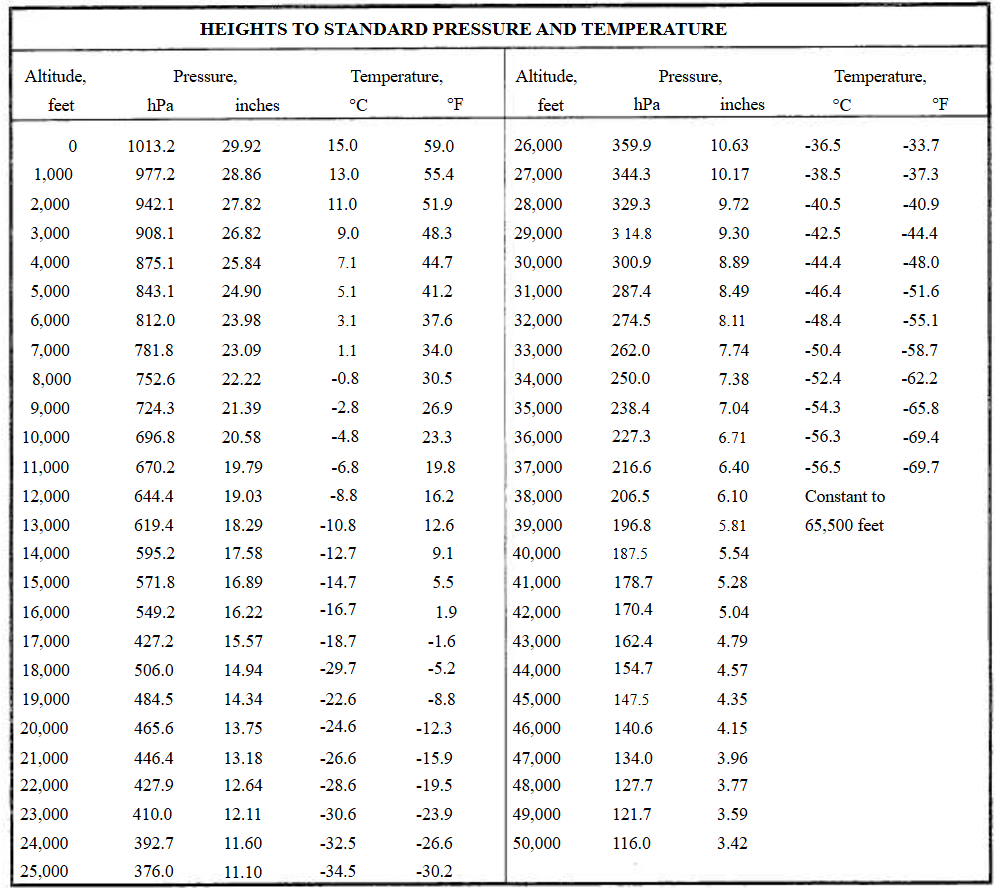

[1] Atmospheric Altitude and Temperature

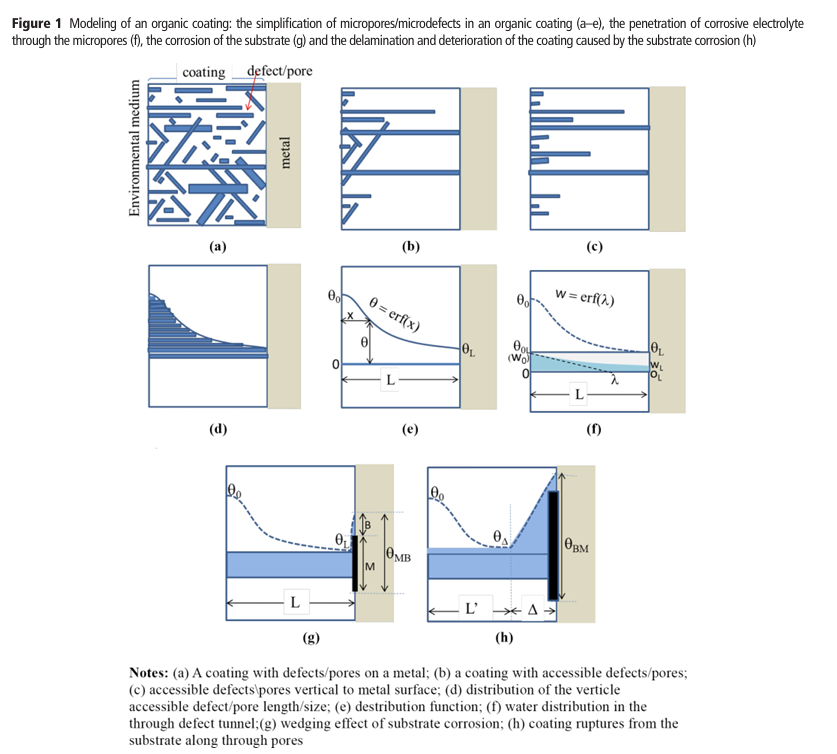

[2] Y.Xu Modeling of an Organic Coating

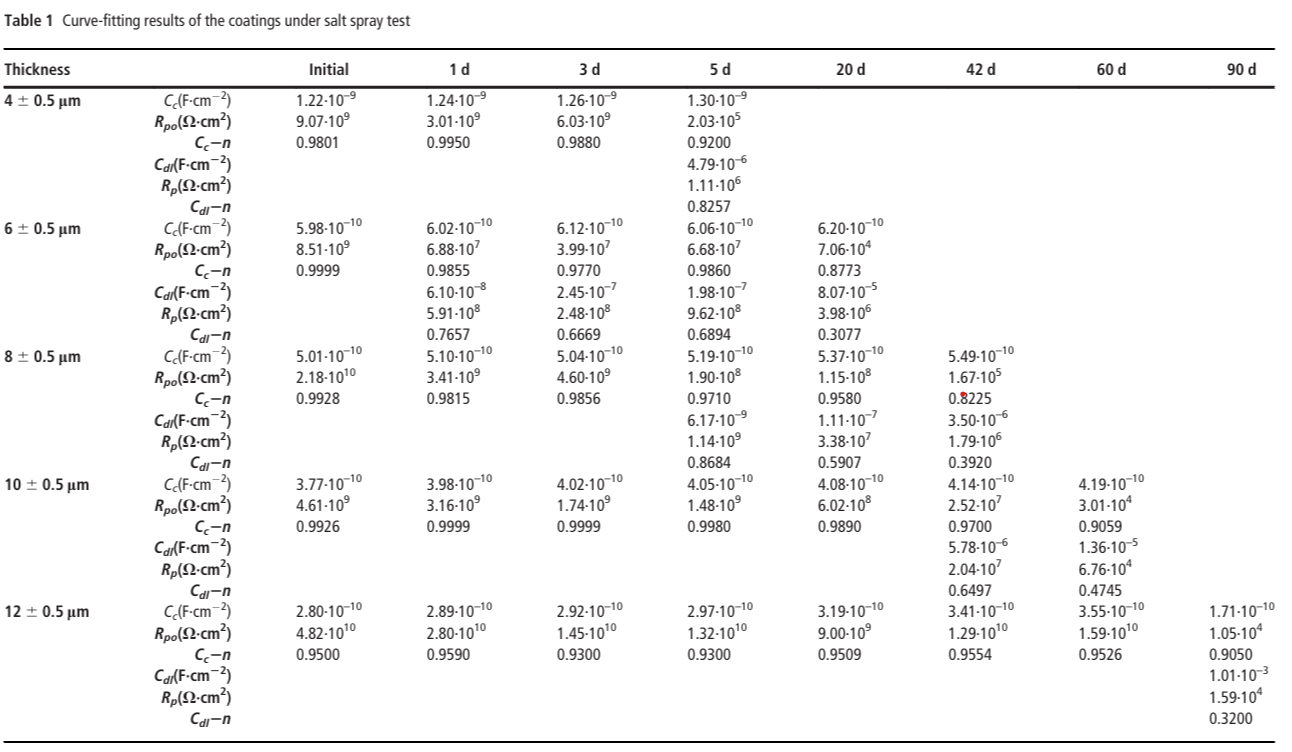

[2] Organic Coating Thicknesses